In [4]:
import urllib.request
import matplotlib.pyplot as plt

def get_pdb_file(protein_name:str):
    print(f"Going to download : {protein_name}")
    file_url = "https://files.rcsb.org/download/"+protein_name+".pdb"
    download_file_name = protein_name+".pdb"
    urllib.request.urlretrieve(file_url, download_file_name)
    print(f"Downloaded {protein_name}.pdb")
    with open(download_file_name) as file_handle:
        data = file_handle.read()
        lines = data.split("\n")
    print("The first line is : " + lines[0])

get_pdb_file("3SJU")

Going to download : 3SJU
Downloaded 3SJU.pdb
The first line is : HEADER    OXIDOREDUCTASE                          21-JUN-11   3SJU              


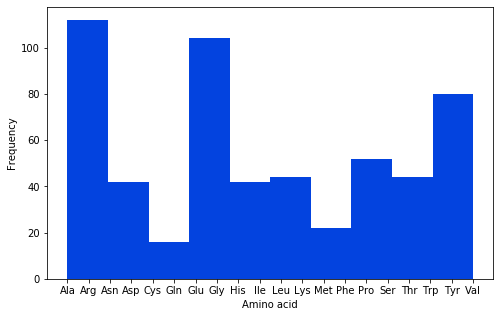

In [15]:
with open("3SJU.pdb") as f:
    data = f.read()
    data = data.split("\n")
all_aa = []
for line in data:
    if line.startswith("SEQRES"):
        this_line_list = line.split()
        this_line_aa = this_line_list[4:]
        [all_aa.append(an_aa.capitalize()) for an_aa in this_line_aa]
sorted_all_aa = sorted(all_aa) #TODO: INCLUDE THIS IN THE LECTURE

plt.figure(figsize=(8,5)) # fig size is optional
plt.hist(sorted_all_aa, color="xkcd:blue")
plt.xlabel("Amino acid");
plt.ylabel("Frequency");
plt.savefig("imgs\f1.png")

#TODO: ADD ATOM EXTRACTION CODE

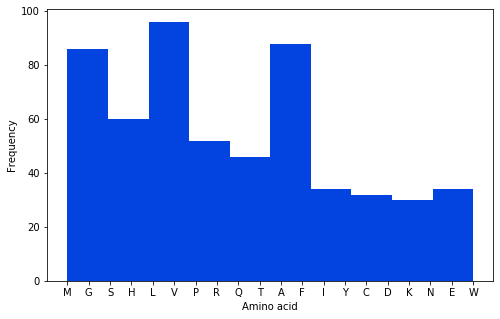

In [9]:
aa_dict = {"ala":"A", "arg":"R", "asn":"N", "asp":"D", 
           "asx":"B", "cys":"C", "glu":"E", 
           "gln":"Q","glx":"Z","gly":"G", "his":"H", 
           "ile":"I","leu":"L", "lys":"K", "met":"M",
           "phe":"F", "pro":"P", "ser":"S", "thr":"T",
           "trp":"W", "tyr":"Y", "val":"V"}
all_aa_one_letter = []
for an_aa in all_aa:
    all_aa_one_letter.append(aa_dict[an_aa.lower()])

plt.figure(figsize=(8,5))
plt.hist(all_aa_one_letter, color="xkcd:blue")
plt.xlabel("Amino acid");
plt.ylabel("Frequency");
plt.savefig("imgs\f2.png")

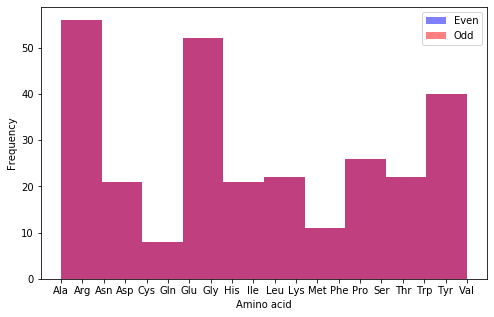

In [7]:
even_aa = []
odd_aa = []

for ind1, an_aa in enumerate(all_aa):
    if ind1 % 2 == 0:
        even_aa.append(an_aa.capitalize())
    else:
        odd_aa.append(an_aa.capitalize())

plt.figure(figsize=(8,5))
plt.hist(even_aa, color="blue", alpha=0.5, label="Even")
plt.hist(odd_aa, color="red", alpha=0.5, label="Odd")
plt.xlabel("Amino acid");
plt.ylabel("Frequency");
plt.legend()
plt.savefig("imgs\f3.png")

# Example notebook

We wish to evaluate the following function

$$ f(x) = \sin(x)$$

at $x = 0.21$

In [1]:
import math
x = 0.21
math.sin(x)

0.20845989984609956

In [14]:
from LongestCommonSubsequence import lcs
get_pdb_file("3SJU")
get_pdb_file("1X7H")

seq1 = extract("3SJU") # returns one letter string
seq2 = extract("1X7H") 
m = len(seq1)
n = len(seq2)
lcs(seq1, seq2, m, n)

The LCS is MSLVGATSGIGLARLARGGRKLRAGVDGCDVSEVAAVVERGPLVNAGRGGGTALDLWDVTNLTGVFRVTVLAGGMRGGRIVNIASTGGKQGVAAPYASKHGVVGFTKGELATGITVNAVCPGVETPMAVREYWVTEERAIGRYSEEVAGGAAATAQALNVCGGLGNY
Length of the LCS is 167
